In [34]:
from ultralytics import YOLO
from easyocr import Reader
import matplotlib.pyplot as plt
import cv2
model = YOLO('./models/best.pt')
# reader = Reader(['en'], gpu=True)
video_path = './Assignment Materials/Assignment Materials/15sec_input_720p.mp4'
image_path = './Assignment Materials/manual test/image2.png'

In [ ]:
# Open video
cap = cv2.VideoCapture(video_path)  # or 0 for webcam

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run detection
    results = model(frame)[0]

    # Draw boxes
    for box in results.boxes:
        cls_id = int(box.cls[0])
        if cls_id!=2:
            continue
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # bounding box
        conf = box.conf[0]
        label = model.names[cls_id]

        # Draw
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, f'{label} {conf:.2f}', (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    cv2.imshow("YOLO Detection", frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


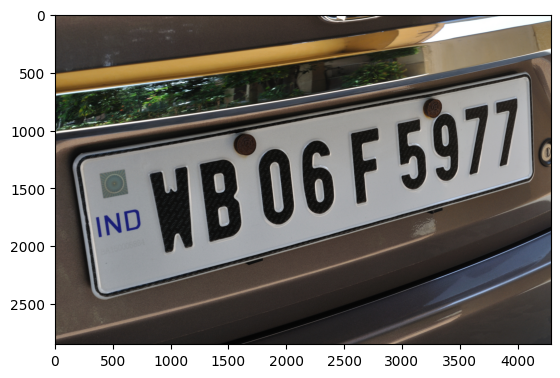

In [35]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import requests
from PIL import Image

processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

# load image from the IAM dataset

image = Image.open(image_path).convert("RGB")

plt.imshow(image)

In [36]:
pixel_values = processor(image, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values)

generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

In [37]:
generated_text

'# WBOGF 59 7 ) .'